# Giriş

- Kaggle'da bulunan "Melbourne Konut Piyasası" veri seti, Melbourne, Avustralya'daki emlak piyasasına kapsamlı bir genel bakış sağlar. Bu veri seti konut fiyatları, mülk özellikleri, konum ve diğer ilgili niteliklerle ilgili geniş bir bilgi yelpazesi sunar. Keşif amaçlı veri analizi yapmak, tahmine dayalı modeller oluşturmak ve Melbourne konut piyasasının dinamiklerine ilişkin içgörü kazanmak için değerli bir kaynaktır.
</br>

"Melbourne Konut Piyasası" veri setinin temel özellikleri şunları içerir:

* Mülk Bilgileri: Veri seti, oda sayısı (yatak odası, banyo), arazi büyüklüğü, inşaat alanı ve mülk türü (ev, apartman dairesi vb.) gibi bireysel mülklerle ilgili ayrıntıları içerir.
* Konum Detayları: Her mülkün bulunduğu banliyö ve belediye alanı hakkında bilgi verilmektedir. Bu, coğrafi analize ve konut fiyatlarının Melbourne'un farklı bölgelerine göre nasıl değiştiğinin anlaşılmasına olanak tanır.
* Fiyat Verileri: Veri seti, mülkün gerçek fiyatı, satış tarihi, mülkün açık artırmada mı yoksa özel satışla mı satıldığı gibi fiyatla ilgili bilgileri içerir.
* Gayrimenkul Özellikleri: Satış yöntemi (açık artırma, S.O., VB, vb.), satıcının adı ve mülk fiyatlarını etkileyebilecek diğer kategorik özellikler de dahil olmak üzere mülklerin çeşitli özellikleri listelenmiştir.
* Ek Özellikler: İnşaat yılı, enlem, boylam ve mülkün adresi gibi ek özellikler mevcuttur.

## İçerik

1.   Veri İçeriği
2.   Python Kütüphaneleri
3.   Veri Çekme ve Okuma
4.   Kayıp Veri
5.   Veri Analizi

> - Describe
> - Object veri analizi
> - Duplicated veri tespiti ve silinmesi

## Veri İçeriği

*   Suburb: Banliyö bölgesi
*   Address: Açık adres
*   Rooms: Oda numarası
*   Price: Avustralya doları cinsinden fiyat

---

Method:

*   S - satılan mülk;
*   SP - önceden satılan mülk;
*   PI - devredilen mülk;
*   PN - önceden satıldı açıklanmadı;
*   SN - satıldı açıklanmadı;
*   NB - teklif yok - Teklife kapalı;
*   VB - satıcı teklifi;
*   W - açık artırmadan önce geri çekildi;
*   SA - açık artırmadan sonra satıldı;
*   SS - Açık artırmadan sonra satılan fiyat açıklanmadı.
*   N/A - fiyat veya en yüksek teklif mevcut değil.
---
Type:
* br - oda(lar);
* h - ev, yazlık, villa, yarı, teras;
* u - unit, duplex;
* t - şehir evi;
* dev site - development site;
* o res - diğer konut.
- SellerG: Emlakçı
- Date: Satış tarihi
- Distance: Kilometre Cinsinden CBD'ye Uzaklık
- Regionname: Genel Bölge (Batı, Kuzey Batı, Kuzey, Kuzey doğu…vb)
- Propertycount: Banliyöde bulunan mülklerin sayısı.
- Bedroom2 : Kazınmış Yatak Odası Sayısı (farklı kaynaktan)
- Bathroom: Banyo Sayısı
- Car: Araç park yeri sayısı
- Landsize: Metre Cinsinden Arazi Büyüklüğü
- BuildingArea: Metre cinsinden Bina Boyutu
- YearBuilt: Evin inşa edildiği yıl
- CouncilArea: Bölge için yönetim konseyi
- Lattitude: Kendini açıklayıcı
- Longtitude: Kendini açıklayıcı

## Python Kütüphaneleri
Gerekli olan python kütüphanelerini ekliyoruz.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as FF
from plotly import tools
import plotly.graph_objs as go

from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.preprocessing import OrdinalEncoder


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Veri Çekme ve Okuma


In [3]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Melbourne_housing_FULL.csv")
df2c = df2.copy()

In [ ]:
# ilk 5 satırlık veriyi inceliyoruz.
df2c.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
# 34857 satır - 21 sütun sayısı olduğunu anlıyoruz.
df2c.shape

(34857, 21)

In [ ]:
# sütun sayısından yola çıkarak bir çok sütunda eksik veri olduğunu fark ediyoruz.
df2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

## Kayıp Veri

In [ ]:
# kayıp veri sayısını görüntülüyoruz.
df2c.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

## Veri Analizi

### Describe İşlemi

In [ ]:
df2c.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


### Object Veri Tespiti

In [ ]:
# object veri tipinde olan verileri tespit ediyoruz
non_numerical_cols2 = df2c.select_dtypes("object")
non_numerical_cols2

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,h,PI,Jas,24/02/2018,Maribyrnong City Council,Western Metropolitan
34853,Yarraville,29A Murray St,h,SP,Sweeney,24/02/2018,Maribyrnong City Council,Western Metropolitan
34854,Yarraville,147A Severn St,t,S,Jas,24/02/2018,Maribyrnong City Council,Western Metropolitan
34855,Yarraville,12/37 Stephen St,h,SP,hockingstuart,24/02/2018,Maribyrnong City Council,Western Metropolitan


In [ ]:
df2c['Date'] = pd.to_datetime(df2c['Date'])
df2c['Month'] = pd.DatetimeIndex(df2c['Date']).month
df2c['Year'] = pd. DatetimeIndex(df2c['Date']).year
df2c.head()

<ipython-input-22-7acd6637e545>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2c['Date'] = pd.to_datetime(df2c['Date'])


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,3,2016
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,3,2016
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,4,2016
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,4,2016
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,4,2017


In [ ]:
df2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

### Duplicate Veri Tespiti ve **Silinmesi**

In [ ]:
duplicate_rows = df2c[df2c.duplicated()]
duplicate_rows

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,2017-06-17,15.4,3131.0,...,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0,6,2017


In [ ]:
# Duplicate satırları orijinal DataFrame üzerinde siler
df2c.drop_duplicates(inplace=True)

In [ ]:
duplicate_rows = df2c[df2c.duplicated()]
duplicate_rows

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year


### Outlier Tespiti

Z-score yöntemini kullanarak ortalamadan kaç standart sapmanın uzakta olduğunu bulabiliriz.

![Z-Score](https://drive.google.com/file/d/1MQs5UHjp0CemSCCiqE7y7qD9CHHPhHUJ/view?usp=share_link)

* Veri noktalarının %68'i + veya - 1 standart sapma arasındadır.
* Veri noktalarının %95'i + veya - 2 standart sapma arasındadır
* Veri noktalarının %99,7'si + veya - 3 standart sapma arasındadır

In [ ]:
out=[]
def Zscore_outlier(data):
    m = np.mean(data)
    sd = np.std(data)
    for i in data:
        z = (i-m)/sd
        if np.abs(z) > 3:
            out.append(i)
    print("Outliers:",out)

In [ ]:
Zscore_outlier(df2c['Landsize'])

Outliers: [75100.0, 15900.0, 15100.0, 37000.0, 21700.0, 14545.0, 41400.0, 14500.0, 17200.0, 17200.0, 14500.0, 17200.0, 16000.0, 15900.0, 21715.0, 17200.0, 13733.0, 37000.0, 38490.0, 14196.0, 76000.0, 15946.0, 17200.0, 433014.0, 40468.0, 16000.0, 17200.0, 12300.0, 20200.0, 14294.0, 44500.0, 21600.0, 89030.0, 40468.0, 146699.0, 33000.0, 40469.0, 39300.0, 15600.0, 23970.0, 40500.0, 80000.0, 42800.0, 6791.0, 3112.0, 1561.0, 3558.0, 3647.0, 4645.0, 44515.0, 2002.0, 6178.0, 75100.0, 15900.0, 15100.0, 37000.0, 21700.0, 14545.0, 41400.0, 14500.0, 17200.0, 17200.0, 14500.0, 17200.0, 16000.0, 15900.0, 21715.0, 17200.0, 13733.0, 37000.0, 38490.0, 14196.0, 76000.0, 15946.0, 17200.0, 433014.0, 40468.0, 16000.0, 17200.0, 12300.0, 20200.0, 14294.0, 44500.0, 21600.0, 89030.0, 40468.0, 146699.0, 33000.0, 40469.0, 39300.0, 15600.0, 23970.0, 40500.0, 80000.0, 42800.0, 75100.0, 15900.0, 15100.0, 37000.0, 21700.0, 14545.0, 41400.0, 14500.0, 17200.0, 17200.0, 14500.0, 17200.0, 16000.0, 15900.0, 21715.0, 172

In [ ]:
Zscore_outlier(df2c['BuildingArea'])

Outliers: [75100.0, 15900.0, 15100.0, 37000.0, 21700.0, 14545.0, 41400.0, 14500.0, 17200.0, 17200.0, 14500.0, 17200.0, 16000.0, 15900.0, 21715.0, 17200.0, 13733.0, 37000.0, 38490.0, 14196.0, 76000.0, 15946.0, 17200.0, 433014.0, 40468.0, 16000.0, 17200.0, 12300.0, 20200.0, 14294.0, 44500.0, 21600.0, 89030.0, 40468.0, 146699.0, 33000.0, 40469.0, 39300.0, 15600.0, 23970.0, 40500.0, 80000.0, 42800.0, 6791.0, 3112.0, 1561.0, 3558.0, 3647.0, 4645.0, 44515.0, 2002.0, 6178.0, 75100.0, 15900.0, 15100.0, 37000.0, 21700.0, 14545.0, 41400.0, 14500.0, 17200.0, 17200.0, 14500.0, 17200.0, 16000.0, 15900.0, 21715.0, 17200.0, 13733.0, 37000.0, 38490.0, 14196.0, 76000.0, 15946.0, 17200.0, 433014.0, 40468.0, 16000.0, 17200.0, 12300.0, 20200.0, 14294.0, 44500.0, 21600.0, 89030.0, 40468.0, 146699.0, 33000.0, 40469.0, 39300.0, 15600.0, 23970.0, 40500.0, 80000.0, 42800.0, 75100.0, 15900.0, 15100.0, 37000.0, 21700.0, 14545.0, 41400.0, 14500.0, 17200.0, 17200.0, 14500.0, 17200.0, 16000.0, 15900.0, 21715.0, 172

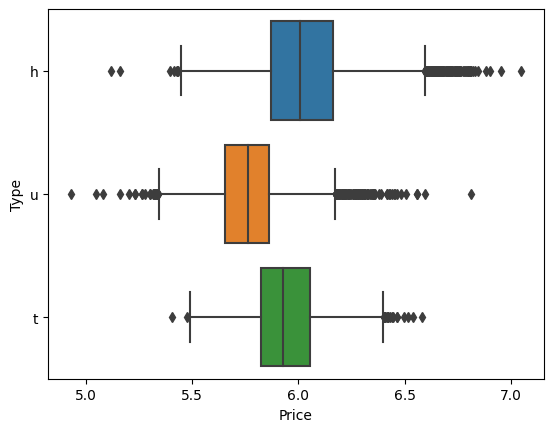

In [66]:
# Fiyattaki aykırı değerleri analiz edinyoruz
sns.boxplot(x=np.log10(df2c['Price']), y='Type', data=df2c)
plt.show()

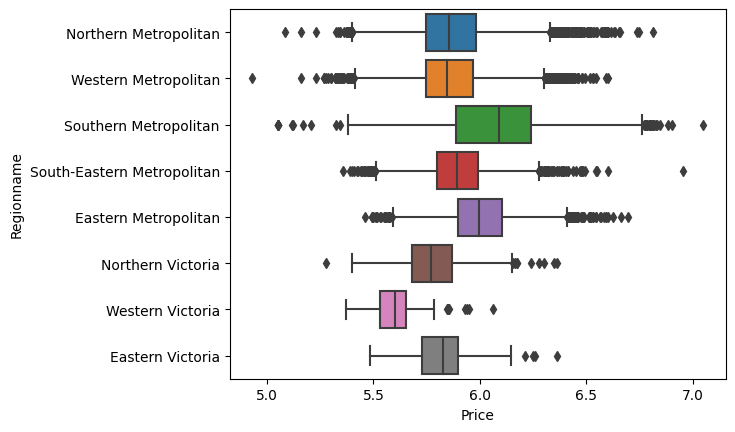

In [ ]:
# Fiyatlara göre bölgelerdeki aykırı değerleri analiz ediyoruz
sns.boxplot(x=np.log10(df2c['Price']), y='Regionname', data=df2c)
plt.show()

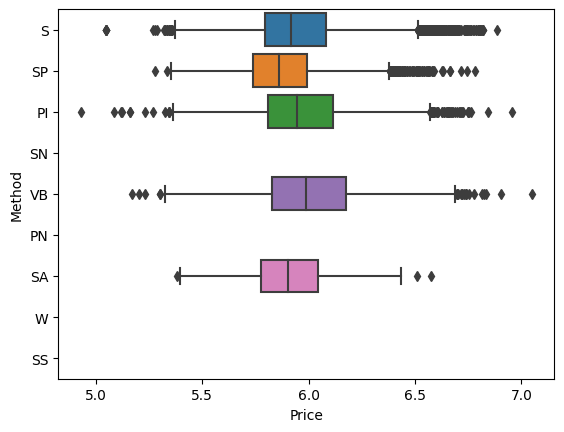

In [ ]:
sns.boxplot(x=np.log10(df2c['Price']), y='Method', data=df2c)
plt.show()

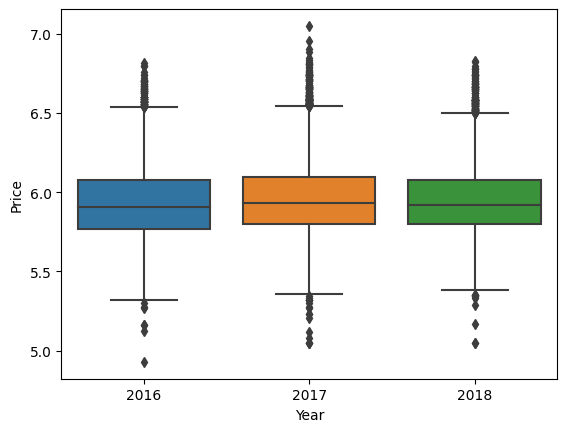

In [ ]:
# Fiyatlara göre bölgelerdeki aykırı değerleri analiz ediyoruz
sns.boxplot(y=np.log10(df2c['Price']), x='Year', data=df2c)
plt.show()

## Kayıp Veri Tespiti

In [ ]:
df2c.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Month                0
Year                 0
dtype: int64

In [ ]:
df2c['Bathroom']= df2c['Bathroom'].fillna(df2c['Bathroom'].mode()[0])
df2c['Car']= df2c['Car'].fillna(df2c['Car'].mode()[0])

In [ ]:
df2c.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Month                0
Year                 0
dtype: int64

In [ ]:
df2c['CouncilArea'] = df2c['CouncilArea'].fillna(df2c['CouncilArea'].mode().iloc[0])


In [ ]:
df2c.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          0
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Month                0
Year                 0
dtype: int64

## Veri Görsellştirme

<ipython-input-65-7d3294de092d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Variable Correlation')

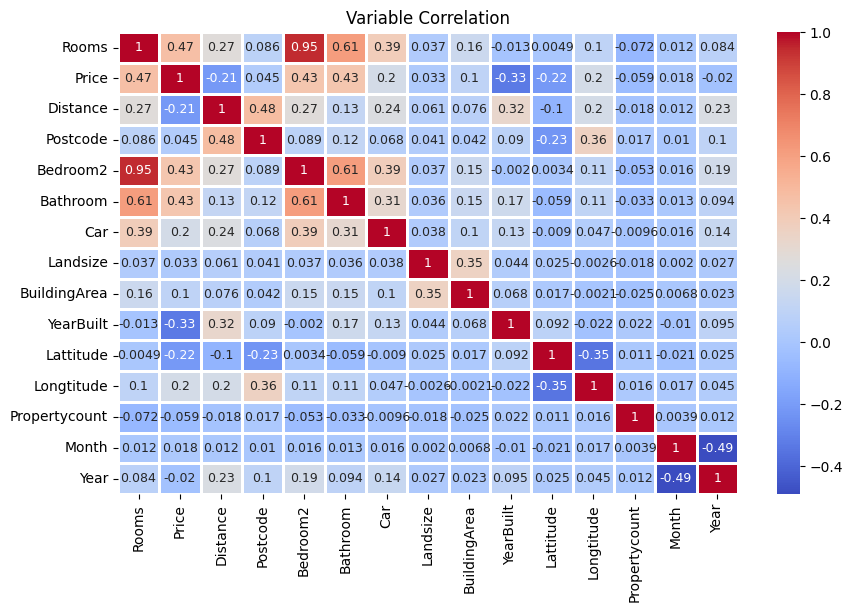

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(df2c.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [24]:
df2c['Date'] = pd.to_datetime(df2c['Date'], format="%d/%m/%Y")

In [25]:
df2c['Month'] = df2c['Date'].dt.month
df2c['Year'] = df2c['Date'].dt.year

In [54]:
total_sales = df2c['Price'].sum()

def month_sales(df2c, month, sales=total_sales):
    share_month_sales = df2c['Price'].loc[df2c['Month'] == month].sum()/sales
    return share_month_sales

january_sales = month_sales(df2c, 1)
february_sales = month_sales(df2c, 2)
march_sales = month_sales(df2c, 3)
april_sales = month_sales(df2c, 4)
may_sales = month_sales(df2c, 5)
june_sales = month_sales(df2c, 6)
july_sales = month_sales(df2c, 7)
august_sales = month_sales(df2c, 8)
september_sales = month_sales(df2c, 9)
october_sales = month_sales(df2c, 10)
november_sales = month_sales(df2c, 11)
december_sales = month_sales(df2c, 12)

month_total_sales = [january_sales, february_sales, march_sales, april_sales,
                     may_sales, june_sales, july_sales, august_sales,
                     september_sales, october_sales, november_sales, december_sales]

labels = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August', 'September',
          'October', 'November', 'December']


colors = ['#ffb4da', '#b4b4ff', '#daffb4', '#fbab60', '#fa8072', '#FA6006',
          '#FDB603', '#639702', '#dacde6', '#faec72', '#9ab973', '#87cefa']

pie_plot = go.Pie(labels=labels, values=month_total_sales,
               hoverinfo='label+percent',
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))

data = [pie_plot]

layout = go.Layout(
    title="Aylara Göre Satış Payı"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

In [53]:
def month_year_sales(df2c, month, year):
    double_conditional = df2c['Price'].loc[(df2c['Month'] == month) & (df2c['Year'] == year)].sum()
    return double_conditional

# Sales 2016
january_2016 = month_year_sales(df2c, 1, 2016)
february_2016 = month_year_sales(df2c, 2, 2016)
march_2016 = month_year_sales(df2c, 3, 2016)
april_2016 = month_year_sales(df2c, 4, 2016)
may_2016 = month_year_sales(df2c, 5, 2016)
june_2016 = month_year_sales(df2c, 6, 2016)
july_2016 = month_year_sales(df2c, 7, 2016)
august_2016 = month_year_sales(df2c, 8, 2016)
september_2016 = month_year_sales(df2c, 9, 2016)
october_2016 = month_year_sales(df2c, 10, 2016)
november_2016 = month_year_sales(df2c, 11, 2016)
december_2016 = month_year_sales(df2c, 12, 2016)

# Sales 2017
january_2017 = month_year_sales(df2c, 1, 2017)
february_2017 = month_year_sales(df2c, 2, 2017)
march_2017 = month_year_sales(df2c, 3, 2017)
april_2017 = month_year_sales(df2c, 4, 2017)
may_2017 = month_year_sales(df2c, 5, 2017)
june_2017 = month_year_sales(df2c, 6, 2017)
july_2017 = month_year_sales(df2c, 7, 2017)
august_2017 = month_year_sales(df2c, 8, 2017)
september_2017 = month_year_sales(df2c, 9, 2017)
october_2017 = month_year_sales(df2c, 10, 2017)
november_2017 = month_year_sales(df2c, 12, 2017)
december_2017 = month_year_sales(df2c, 12, 2017)

# Sales 2018 (Until May)
january_2018 = month_year_sales(df2c, 1, 2018)
february_2018 = month_year_sales(df2c, 2, 2018)
march_2018 = month_year_sales(df2c, 3, 2018)
april_2018 = month_year_sales(df2c, 4, 2018)
may_2018 = month_year_sales(df2c, 5, 2018)


# List of values
lst_2016 = [january_2016, february_2016, march_2016, april_2016,
           may_2016, june_2016, july_2016, august_2016,
           september_2016, october_2016, november_2016, december_2016]

lst_2017 = [january_2017, february_2017, march_2017, april_2017,
           may_2017, june_2017, july_2017, august_2017,
           september_2017, october_2017, november_2017, december_2017]


lst_2018 = [january_2018, february_2018, march_2018, april_2018,
           may_2018]


plot_2016 = go.Scatter(
    x=lst_2016,
    y=labels,
    xaxis='x2',
    yaxis='y2',
    mode='markers',
    name='2016',
    marker=dict(
        color='rgba(0, 128, 128, 0.95)',
        line=dict(
            color='rgba(56, 56, 56, 1)',
            width=1.5,
        ),
        symbol='circle',
        size=16,
    )
)


plot_2017 = go.Scatter(
    x=lst_2017,
    y=labels,
    xaxis='x2',
    yaxis='y2',
    mode='markers',
    name='2017',
    marker=dict(
        color='rgba(255, 72, 72, 0.95)',
        line=dict(
            color='rgba(56, 56, 56, 1)',
            width=1.5,
        ),
        symbol='circle',
        size=16,
    )
)

plot_2018 = go.Scatter(
    x=lst_2018,
    y=labels,
    xaxis='x2',
    yaxis='y2',
    mode='markers',
    name='2018',
    marker=dict(
        color='rgba(72, 255, 72, 0.95)',
        line=dict(
            color='rgba(56, 56, 56, 1)',
            width=1.5,
        ),
        symbol='circle',
        size=16,
    )
)

data = [plot_2016, plot_2017, plot_2018]

layout = go.Layout(
    title="Yıllara Göre ve Aylara Göre Satışlar <br> (2016, 2017, 2018)",

)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='multiple-subplots')

In [56]:
df2c['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria', nan], dtype=object)

In [64]:
all_regions = df['Price'].values
northern_metropolitan = df2c['Price'].loc[df2c['Regionname'] == 'Northern Metropolitan'].values
southern_metropolitan = df2c['Price'].loc[df2c['Regionname'] == 'Southern Metropolitan'].values
eastern_metropolitan = df2c['Price'].loc[df2c['Regionname'] == 'Eastern Metropolitan'].values
western_metropolitan = df2c['Price'].loc[df2c['Regionname'] == 'Western Metropolitan'].values
southeastern_metropolitan = df2c['Price'].loc[df2c['Regionname'] == 'South-Eastern Metropolitan'].values
northern_victoria = df2c['Price'].loc[df2c['Regionname'] == 'Northern Victoria'].values
eastern_victoria = df2c['Price'].loc[df2c['Regionname'] == 'Eastern Victoria'].values
western_victoria = df2c['Price'].loc[df2c['Regionname'] == 'Western Victoria'].values
gaussian_distribution = np.log(df2c['Price'].values)


# Histograms
overall_price_plot = go.Histogram(
    x=all_regions,
    name='All Regions',
    marker=dict(
        color='#6E6E6E'
    )
)


northern_metropolitan_plot = go.Histogram(
    x=northern_metropolitan,
    name='Northern Metropolitan',
    marker=dict(
        color='#2E9AFE'
    )
)

southern_metropolitan_plot = go.Histogram(
    x=southern_metropolitan,
    name='Southern Metropolitan',
    marker=dict(
        color='#FA5858'
    )
)


eastern_metropolitan_plot = go.Histogram(
    x=eastern_metropolitan,
    name='Eastern Metropolitan',
    marker=dict(
        color='#81F781'
    )
)

western_metropolitan_plot = go.Histogram(
    x=western_metropolitan,
    name='Western Metropolitan',
    marker=dict(
        color='#BE81F7'
    )
)

southeastern_metropolitan_plot = go.Histogram(
    x=southeastern_metropolitan,
    name='SouthEastern Metropolitan',
    marker=dict(
        color='#FE9A2E'
    )
)

northern_victoria_plot = go.Histogram(
    x=northern_victoria,
    name='Northern Victoria',
    marker=dict(
        color='#04B4AE'
    )
)

eastern_victoria_plot = go.Histogram(
    x=eastern_victoria,
    name='Eastern Victoria',
    marker=dict(
        color='#088A08'
    )
)


western_victoria_plot = go.Histogram(
    x=western_victoria,
    name='Western Victoria',
    marker=dict(
        color='#8A0886'
    )
)

gaussian_distribution_plot = go.Histogram(
    x=gaussian_distribution,
    histnorm='probability',
    name='Gaussian Distribution',
    marker=dict(
        color='#800000'
    )
)

fig = tools.make_subplots(rows=6, cols=2, print_grid=False, specs=[[{'colspan': 2}, None], [{}, {}], [{}, {}], [{}, {}], [{}, {}], [{'colspan': 2}, None]],
                         subplot_titles=(
                             'Genel Fiyat Dağılımı',
                             'Kuzey Metropolitan',
                             'Güney Metropolitan',
                             'Doğu Metropolitan',
                             'Batı Metropolitan',
                             'Güneydoğu Metropolitan',
                             'Kuzey Victoria',
                             'Doğu Victoria',
                             'Batı Victoria',
                             'Fiyatın Gauss Dağılımı'
                             ))
fig.append_trace(overall_price_plot, 1, 1)
fig.append_trace(northern_metropolitan_plot, 2, 1)
fig.append_trace(southern_metropolitan_plot, 2, 2)
fig.append_trace(eastern_metropolitan_plot, 3, 1)
fig.append_trace(western_metropolitan_plot, 3, 2)
fig.append_trace(southeastern_metropolitan_plot, 4, 1)
fig.append_trace(northern_victoria_plot, 4, 2)
fig.append_trace(eastern_victoria_plot, 5, 1)
fig.append_trace(western_victoria_plot, 5, 2)
fig.append_trace(gaussian_distribution_plot, 6, 1)

fig['layout'].update(showlegend=False, title="Price Distributions by Region",
                    height=1200, width=800)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

## Train Test split

In [67]:
df2c.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'Month', 'Year'],
      dtype='object')

In [71]:
X =df2c[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'Propertycount']]

y = df2c['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train,y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))